# Text_Classification_Project

2 Wordclouds of the bands: My Dying Bride & Tiamat

In [81]:
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

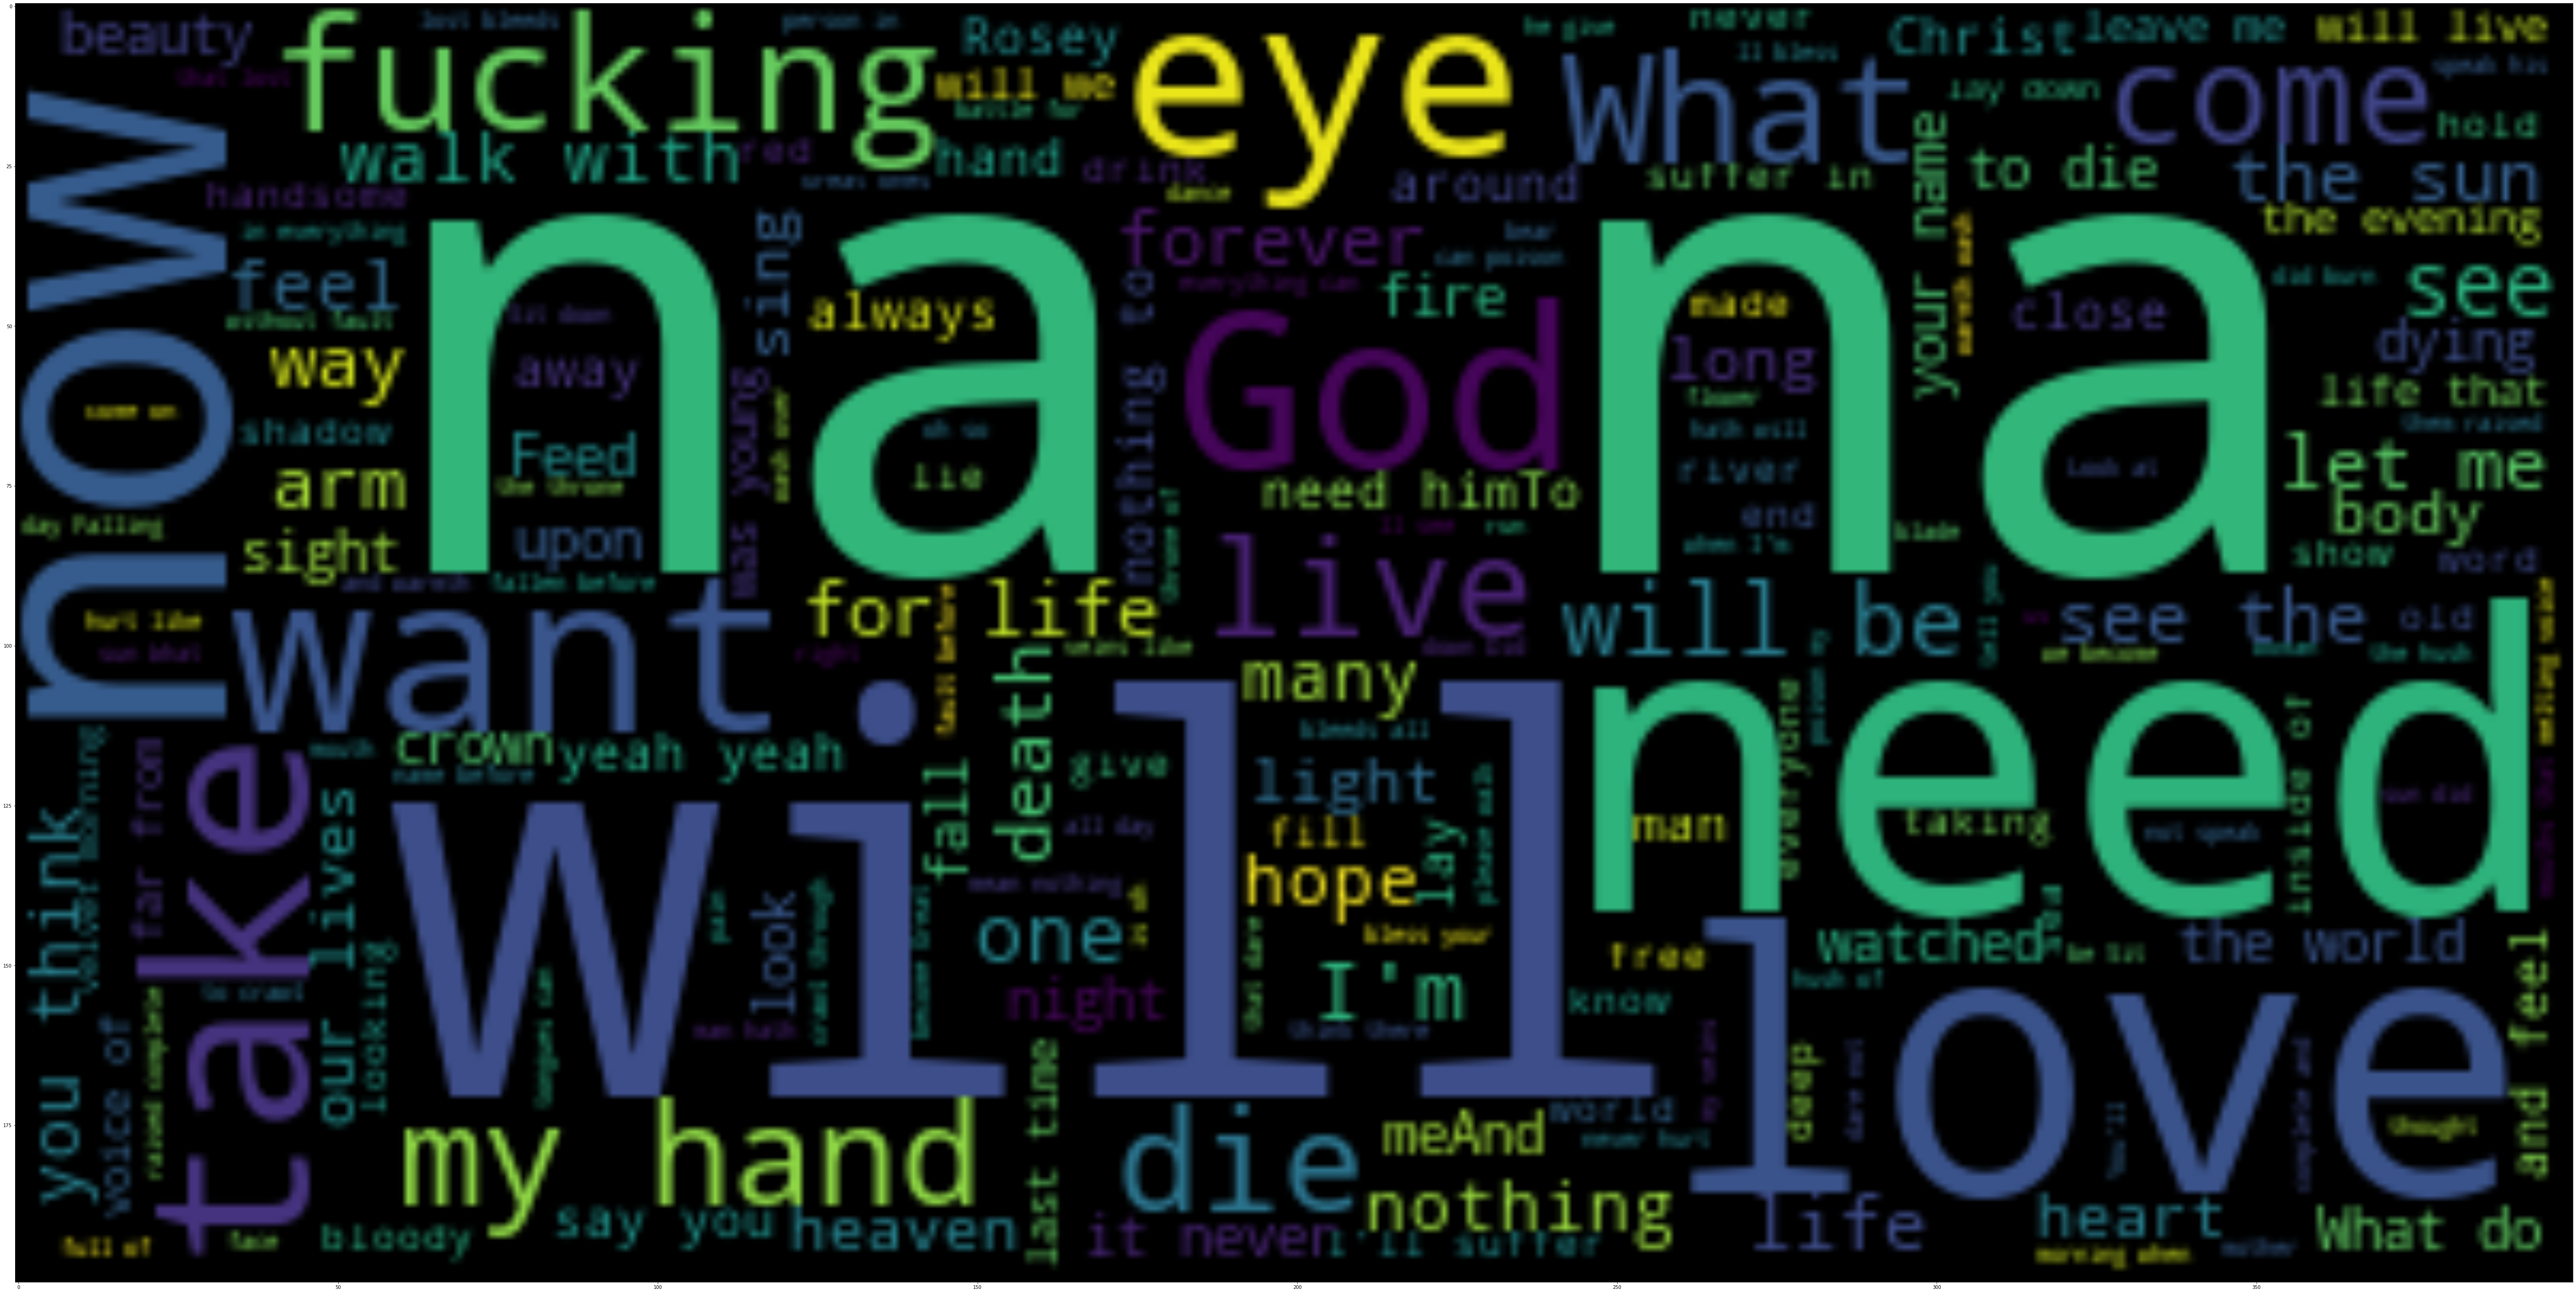

In [82]:
#My_Dying_Bride
stopwords = set(STOPWORDS) 
cloud = WordCloud(max_words=1400,stopwords = stopwords).generate(str(My_Dying_Bride_all_lyrics))

plt.figure(figsize = (100,100))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud_My_Dying_Bride.png')
plt.show()

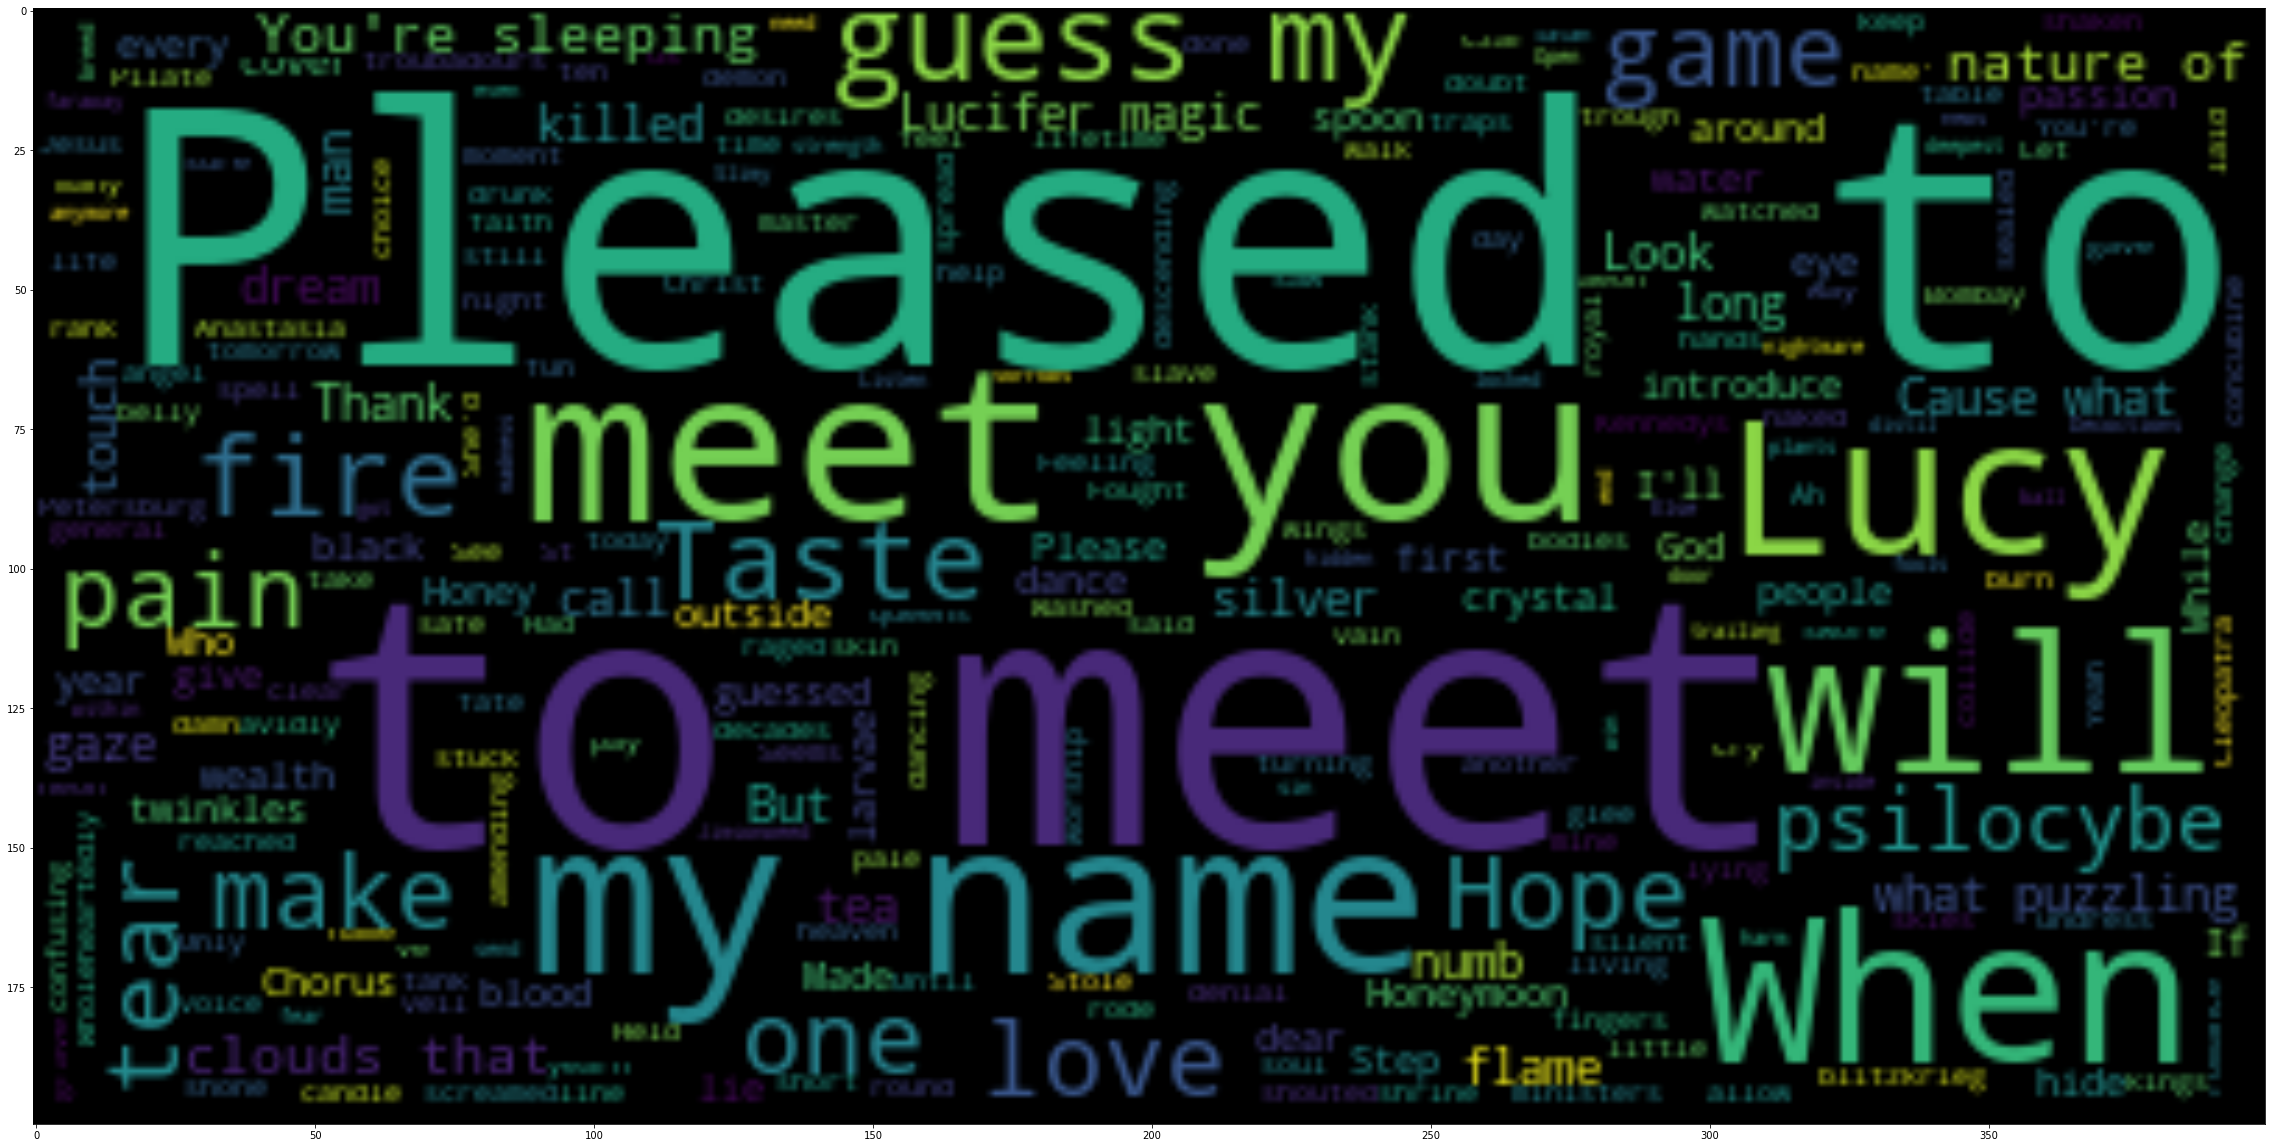

In [83]:
#Tiamat
stopwords = set(STOPWORDS) 
cloud = WordCloud(max_words=1400,stopwords = stopwords).generate(str(Tiamat_all_lyrics))

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud_tiamat.png')
plt.show()

In [3]:
import requests

r = requests.get('https://www.lyrics.com/artist/My-Dying-Bride/21722')

print(r.status_code)
print(r.text[:])

200

<!doctype html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title>My Dying Bride Lyrics</title>
<meta name="description" content="My Dying Bride Lyrics - All the great songs and their lyrics from My Dying Bride on Lyrics.com">
<meta name="keywords" content="My Dying Bride lyrics, My Dying Bride song lyrics, My Dying Bride lyric">
	<meta name="viewport" content="width=device-width">
<base href="https://www.lyrics.com/">

<script>version='1.2.07';allowed_url=1;</script>

<!-- Bootstrap compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css/bootstrap.min.css">
<!--<link rel="stylesheet" 

In [4]:
#Save the page to a text file
html = r.text  # contents of the result page
open('search_result_mdb.html', 'w').write(html)

96496

Examine the HTML code and look for links to songs

In [5]:
import re

results = re.findall('<a href="/lyric.+>', html) #extract links from Url
results

['<a href="/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy">The Crown of Sympathy</a></strong></td><td class="tar qx">12:11</td></tr><tr><td class="tal qx"><strong><a href="/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember">A Kiss to Remember</a></strong></td><td class="tar qx">7:31</td></tr><tr><td class="tal qx"><strong><a href="/lyric/33365590/My+Dying+Bride/For+You">For You</a></strong></td><td class="tar qx">6:37</td></tr><tr><td class="tal qx"><strong><a href="/lyric/33365582/My+Dying+Bride/Two+Winters+Only">Two Winters Only</a></strong></td><td class="tar qx">9:02</td></tr><tr><td class="tal qx"><strong><a href="/lyric/33365581/My+Dying+Bride/Your+River">Your River</a></strong></td><td class="tar qx">9:23</td></tr><tr><td class="tal qx"><strong><a href="/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning">Some Velvet Morning</a></strong></td><td class="tar qx">5:58</td></tr><tr><td class="tal qx"><strong><a href="/lyric/33365579/My+Dying+Bride/Roads">Roads</a></strong></td><

Extract all links using Regular Expressions

In [6]:

links=re.sub(r'<a href="',r'https://www.lyrics.com',\
             str(results), count=0, flags=0)
links
links_compl=re.sub(r'</td></tr><tr><td class="tal qx"><strong>',r'',\
                   str(links), count=0,flags=0)
links_compl


'[\'https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy">The Crown of Sympathy</a></strong></td><td class="tar qx">12:11https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember">A Kiss to Remember</a></strong></td><td class="tar qx">7:31https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You">For You</a></strong></td><td class="tar qx">6:37https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only">Two Winters Only</a></strong></td><td class="tar qx">9:02https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River">Your River</a></strong></td><td class="tar qx">9:23https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning">Some Velvet Morning</a></strong></td><td class="tar qx">5:58https://www.lyrics.com/lyric/33365579/My+Dying+Bride/Roads">Roads</a></strong></td><td class="tar qx">5:07https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless">To Remain Tombless</a></strong></td><td class="tar qx">6:0

In [7]:
#https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy
#">The Crown of Sympathy</a></strong></td><td class="tar qx">12:11
#">A Kiss to Remember</a></strong></td><td class="tar qx">7:31
links_compl1=re.split(r'\D\D\w+</a></strong></td><td class="tar qx">\d+:\d+',\
                    str(links_compl))
links_compl1

['[\'https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy">The Crown o',
 'https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember">A Kiss t',
 'https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You">Fo',
 'https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only">Two Winter',
 'https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River">You',
 'https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning">Some Velve',
 'https://www.lyrics.com/lyric/33365579/My+Dying+Bride/Roads',
 'https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless">To Remai',
 '</td></tr></tbody></table></div><div class="clearfix"><h3 class="artist-album-label">https://www.lyrics.com/album/2734038/Introducing...">Introducing...</a> <span class="year">[2013]</span></h3><div class="artist-album-thumb"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWFgOswDQI4_8dSircGebJ6WbMFHc-4Fk_4Ym6xTHSqxBygu4ufeKkWarQ"><

In [8]:
links_compl1

['[\'https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy">The Crown o',
 'https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember">A Kiss t',
 'https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You">Fo',
 'https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only">Two Winter',
 'https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River">You',
 'https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning">Some Velve',
 'https://www.lyrics.com/lyric/33365579/My+Dying+Bride/Roads',
 'https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless">To Remai',
 '</td></tr></tbody></table></div><div class="clearfix"><h3 class="artist-album-label">https://www.lyrics.com/album/2734038/Introducing...">Introducing...</a> <span class="year">[2013]</span></h3><div class="artist-album-thumb"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWFgOswDQI4_8dSircGebJ6WbMFHc-4Fk_4Ym6xTHSqxBygu4ufeKkWarQ"><

In [9]:
links_compl_2=re.sub(r'">\w+',r'', str(links_compl1))
re.findall(r"\\'", links_compl_2)
links_compl_3=re.sub(r"\\\'", r'', str(links_compl_2))
links_compl_3

'[\'[https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy Crown o\', \'https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember Kiss t\', \'https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You\', \'https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only Winter\', \'https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River\', \'https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning Velve\', \'https://www.lyrics.com/lyric/33365579/My+Dying+Bride/Roads\', \'https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless Remai\', \'</td></tr></tbody></table></div><div class="clearfix"><h3 class="artist-album-label://www.lyrics.com/album/2734038/Introducing......</a> <span class="year">[2013]</span></h3><div class="artist-album-thumb"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWFgOswDQI4_8dSircGebJ6WbMFHc-4Fk_4Ym6xTHSqxBygu4ufeKkWarQ"></div><table class="tdata"><colgroup><col sty

In [10]:
links_compl_4=re.sub(r"\'", r'', str(links_compl_3))
links_compl_4

'[[https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy Crown o, https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember Kiss t, https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You, https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only Winter, https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River, https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning Velve, https://www.lyrics.com/lyric/33365579/My+Dying+Bride/Roads, https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless Remai, </td></tr></tbody></table></div><div class="clearfix"><h3 class="artist-album-label://www.lyrics.com/album/2734038/Introducing......</a> <span class="year">[2013]</span></h3><div class="artist-album-thumb"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWFgOswDQI4_8dSircGebJ6WbMFHc-4Fk_4Ym6xTHSqxBygu4ufeKkWarQ"></div><table class="tdata"><colgroup><col style="width: 300px;"><col style="wid

In [11]:
links_compl_5=re.sub(r"\[\[",r'', str(links_compl_4))
links_compl_5

link_test=re.findall(r'https\://www\.lyrics\.com/lyric/\d+/My\+Dying\+Bride/\w+\+\S+',links_compl_5)
link_test

['https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy',
 'https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember',
 'https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You,',
 'https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only',
 'https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River,',
 'https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning',
 'https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless',
 'https://www.lyrics.com/lyric/29397175/My+Dying+Bride/The+Snow+in+My+Hand',
 'https://www.lyrics.com/lyric/29397173/My+Dying+Bride/A+Kiss+to+Remember',
 'https://www.lyrics.com/lyric/29397168/My+Dying+Bride/To+Remain+Tombless',
 'https://www.lyrics.com/lyric/27967493/My+Dying+Bride/Kneel+till+Doomsday',
 'https://www.lyrics.com/lyric/27967492/My+Dying+Bride/The+Poorest+Waltz',
 'https://www.lyrics.com/lyric/27967491/My+Dying+Bride/A+Tapestry+Scorned',
 'https://www.lyrics.com/l

In [12]:
link_test
links_final=[]
link_test_red=[]
link_testloop=[]
for i in range(len(link_test)):
    #print(link_test[i])
    link_test_red=link_test[i].replace('https://www.lyrics.com/lyric/','')
    link_test_red=link_test_red[24:]
    #print(link_test_red)
    if link_test_red not in link_testloop:
        links_final.append(link_test[i])
        #print(link_testloop)
    link_testloop.append(link_test_red)
    #print(link_testloop, link_test_red)
    
print(len(links_final))
links_final
#print(link_test_red)
#links_final
#print(len(links_final))
#print(len(link_testloop))

68


['https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy',
 'https://www.lyrics.com/lyric/33365592/My+Dying+Bride/A+Kiss+to+Remember',
 'https://www.lyrics.com/lyric/33365590/My+Dying+Bride/For+You,',
 'https://www.lyrics.com/lyric/33365582/My+Dying+Bride/Two+Winters+Only',
 'https://www.lyrics.com/lyric/33365581/My+Dying+Bride/Your+River,',
 'https://www.lyrics.com/lyric/33365580/My+Dying+Bride/Some+Velvet+Morning',
 'https://www.lyrics.com/lyric/33365571/My+Dying+Bride/To+Remain+Tombless',
 'https://www.lyrics.com/lyric/29397175/My+Dying+Bride/The+Snow+in+My+Hand',
 'https://www.lyrics.com/lyric/27967493/My+Dying+Bride/Kneel+till+Doomsday',
 'https://www.lyrics.com/lyric/27967492/My+Dying+Bride/The+Poorest+Waltz',
 'https://www.lyrics.com/lyric/27967491/My+Dying+Bride/A+Tapestry+Scorned',
 'https://www.lyrics.com/lyric/27967490/My+Dying+Bride/Like+a+Perpetual+Funeral',
 'https://www.lyrics.com/lyric/27967489/My+Dying+Bride/A+Map+of+All+Our+Failures',
 'https://www

webscratch one song

In [13]:
response = requests.get('https://www.lyrics.com/lyric/33365594/My+Dying+Bride/The+Crown+of+Sympathy')
My_Dying_Bride_html = response.text
print(type(My_Dying_Bride_html) ,response)
print(My_Dying_Bride_html)

<class 'str'> <Response [200]>

<!doctype html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title>Crown of Sympathy [Remix] Lyrics</title>
<meta name="description" content="Lyrics to Crown of Sympathy [Remix] by My Dying Bride from the Meisterwerk 3 album - including song video, artist biography, translations and more!">
<meta name="keywords" content="Crown of Sympathy [Remix] lyrics, lyrics for Crown of Sympathy [Remix], Crown of Sympathy [Remix] song, Crown of Sympathy [Remix] words, lyrics from Meisterwerk 3">
	<meta name="viewport" content="width=device-width">
<base href="https://www.lyrics.com/">

<script>version='1.2.07';allowed_url=1;</

In [14]:
from bs4 import BeautifulSoup
My_Dying_Bride_soup = BeautifulSoup(My_Dying_Bride_html, 'html.parser')
print(type(My_Dying_Bride_soup),My_Dying_Bride_soup)

<class 'bs4.BeautifulSoup'> 
<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Crown of Sympathy [Remix] Lyrics</title>
<meta content="Lyrics to Crown of Sympathy [Remix] by My Dying Bride from the Meisterwerk 3 album - including song video, artist biography, translations and more!" name="description"/>
<meta content="Crown of Sympathy [Remix] lyrics, lyrics for Crown of Sympathy [Remix], Crown of Sympathy [Remix] song, Crown of Sympathy [Remix] words, lyrics from Meisterwerk 3" name="keywords"/>
<meta content="width=device-width" name="viewport"/>
<base href="https://www.lyrics.com/"/>
<script>version='1.2.07';allowed_url=1;

In [15]:
My_Dying_Bride_1_song= My_Dying_Bride_soup.find('pre', attrs = {'id' : 'lyric-body-text'}).text.replace("\'","")

In [16]:
My_Dying_Bride_1_song

'See the light and feel my warm desirerun through my veins like the evening sunIt will live but no eyes will see itIll bless your name before I dieNo person in everything can shineyet shine you did, for the world to seeAll a man hath will he give for life?For life thats lost bleeds all over meId fallen before but it never hurt like thisDont leave me here to crawl through the mireIm without fault before the throne of godTake from me the crown of sympathyWhat do you think youll see?What do you think there will be?Sit down! Did you see the sun?What will we become? Great ones?The mouths that dare not speak his namebehold them, raised, complete and fineThe battle for our lives is oh, so briefTake my hand and please walk with meWhen I was young the sun did burn my faceI let its love and warmth wash over meThe melting voice of many, in the hush of nightWhispering tongues can poison my honest truthCome dress me with your body, and comfort meI dreamt of a dead child in my sleepI wear a terrible

In [17]:
import time
#text mit loop abgreifen extract lyrics from url
My_Dying_Bride_all_lyrics=[]
for element in list(links_final):
    time.sleep(5)
    response = requests.get(element)
    My_Dying_Bride_html = response.text
    My_Dying_Bride_soup = BeautifulSoup(My_Dying_Bride_html, 'html.parser')
    My_Dying_Bride_all_lyrics.append(My_Dying_Bride_soup.find('pre', attrs = {'id' : 'lyric-body-text'}).text.replace("\n",""))

In [18]:
My_Dying_Bride_all_lyrics

['See the light and feel my warm desirerun through my veins like the evening sunIt will live but no eyes will see itI\'ll bless your name before I dieNo person in everything can shineyet shine you did, for the world to seeAll a man hath will he give for life?For life that\'s lost bleeds all over meI\'d fallen before but it never hurt like thisDon\'t leave me here to crawl through the mireI\'m without fault before the throne of godTake from me the crown of sympathyWhat do you think you\'ll see?What do you think there will be?Sit down! Did you see the sun?What will we become? Great ones?The mouths that dare not speak his namebehold them, raised, complete and fineThe battle for our lives is oh, so briefTake my hand and please walk with meWhen I was young the sun did burn my faceI let its love and warmth wash over meThe melting voice of many, in the hush of nightWhispering tongues can poison my honest truthCome dress me with your body, and comfort meI dreamt of a dead child in my sleepI we

webscratch second band with own def of a function

In [19]:
def scratch_lyrics(band):
    r = requests.get('https://www.lyrics.com/artist/'+band)
    print(r.status_code)
    html = r.text
    results = re.findall('<a href="/lyric.+>', html)
    links=re.sub(r'<a href="',r'https://www.lyrics.com',\
             str(results), count=0, flags=0)
    #print(links)
    link_test=re.findall(r'https://w{3}.\w+.\w+/\w+/\d\d\d\d\d\d\d\d/\w+/\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\+?\%?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\+?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\%?\+?\w?\w?\w?\w?\w?\w?\w?\w?\+?\w?\w?\+?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\"?',links)
    #                     https://www.lyrics.com/lyric/6799621/Tiamat/Wings+of+Heaven
    print(link_test)
    links_final_tiamat=[]
    link_test_red=[]
    link_testloop=[]
    for i in range(len(link_test)):
    #print(link_test[i])
        link_test_red=link_test[i].replace('https://www.lyrics.com/lyric/','')
        link_test_red=link_test_red[16:]
        #if link_test_red[0]==(r'\d'):
         #   print('here',link_test_red[0])
          #  links_test_red=re.sub(r"\d", r'', str(link_test_red))
        #print(link_test_red)
        if link_test_red not in link_testloop:
            links_final_tiamat.append(link_test[i])
            #print(link_testloop)
            link_testloop.append(link_test_red)
            #print(link_testloop, link_test_red)
    #print(len(links_final))
    return links_final_tiamat

links_final_tiamat=scratch_lyrics('Tiamat')

200
['https://www.lyrics.com/lyric/12619201/Tiamat/Sleeping+%28In+the+Fire', 'https://www.lyrics.com/lyric/18388315/Tiamat/Sympathy+For+the+Devil"', 'https://www.lyrics.com/lyric/18406795/Tiamat/Lucy"', 'https://www.lyrics.com/lyric/10248318/Tiamat/Wings+of+Heaven"', 'https://www.lyrics.com/lyric/36188888/Tiamat/Clouds"', 'https://www.lyrics.com/lyric/28449426/Tiamat/Wildhoney"']


In [20]:
links_final_tiamat

['https://www.lyrics.com/lyric/12619201/Tiamat/Sleeping+%28In+the+Fire',
 'https://www.lyrics.com/lyric/18388315/Tiamat/Sympathy+For+the+Devil"',
 'https://www.lyrics.com/lyric/18406795/Tiamat/Lucy"',
 'https://www.lyrics.com/lyric/10248318/Tiamat/Wings+of+Heaven"',
 'https://www.lyrics.com/lyric/36188888/Tiamat/Clouds"',
 'https://www.lyrics.com/lyric/28449426/Tiamat/Wildhoney"']

webscratch one song

In [21]:
response = requests.get('https://www.lyrics.com/lyric/1944536/Tiamat/Do+You+Dream+of+Me%3F')
Tiamat_Do_you_html = response.text
#print(type(Tiamat_Do_you_html) ,response)
#print(Tiamat_Do_you_html)
Tiamat_Do_you_soup = BeautifulSoup(Tiamat_Do_you_html, 'html.parser')
Tiamat_1_song= Tiamat_Do_you_soup.find('pre', attrs = {'id' : 'lyric-body-text'}).text.replace("\n"," ")
Tiamat_1_song=[Tiamat_1_song]
Tiamat_1_song

["Come down, slowly I am waiting by your side Come down, carefully I am waiting by your side  I'll grab you when you fall Down to the waking hours Silent sweeps as golden corn Down to the waking hours  How I wish that I could Break into your dreams Do I have the force I need To break into your dreams  I hold you in my arms Dimmed by scarlet morning red I whisper in you ear Do you dream of me"]

now extract all lyrics from url

In [22]:
Tiamat_all_lyrics=[]
for element in list(links_final_tiamat):
    time.sleep(5)
    response = requests.get(element)
    Tiamat_html = response.text
    Tiamat_soup = BeautifulSoup(Tiamat_html, 'html.parser')
    Tiamat_all_lyrics.append(Tiamat_soup.find('pre', attrs = {'id' : 'lyric-body-text'}).text.replace("\n"," "))

In [23]:
Tiamat_all_lyrics

["Touch, touch in the flame's desires  Feeling the pain's denial,  And your fingers in the fire     Look, look in the candle light See in the flame of life And my spell is our lie     [Chorus:] Taste the love    The passion and all the pain are one The Lucifer's magic that makes you numb   You're sleeping in the fire  Taste the love  The Lucifer's magic that makes you numb You feel what it does and you're drunk on love You're sleeping in the fire    I gaze at the flame and fire burn   And cry out the name of which I yearn    [Chorus]  Taste the love   The Lucifer's magic that makes you numb   The passion and all the pain are one  You're sleeping in the fire    ",
 'Please allow me to introduce myself  I\'m a man of wealth and taste  I\'ve been around for a long, long year  Stole many a man\'s soul and faith   And I was \'round when Jesus Christ  Had his moment of doubt and pain  Made damn sure that Pilate  Washed his hands and sealed his fate   Pleased to meet you  Hope you guess my na

In [24]:
All_lyrics=My_Dying_Bride_all_lyrics+Tiamat_all_lyrics
#All_lyrics
#len(All_lyrics)
#len(My_Dying_Bride_all_lyrics)
#len(Tiamat_all_lyrics)

In [25]:
corpus = All_lyrics
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(corpus)
out = cv.transform(corpus)
corpus
out.todense()
df = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
df

6th  abovegoodbye  ache  aches  achesthe  acid  adieu  adieus  admit  \
0     0             0     0      0         0     0      0       1      0   
1     0             0     0      0         0     0      0       0      0   
2     0             0     0      0         0     0      0       0      0   
3     0             0     0      0         0     0      0       0      0   
4     0             0     0      0         0     0      0       0      0   
..  ...           ...   ...    ...       ...   ...    ...     ...    ...   
69    0             0     0      0         0     0      0       0      0   
70    0             0     0      0         0     0      0       0      0   
71    0             0     0      0         0     0      0       0      0   
72    0             0     0      0         0     0      0       0      0   
73    0             0     0      0         0     1      0       0      0   

    aeon  ...  youtake  youthat  youthe  youto  youtogether  youtouch  youwe  \
0      0  ...        0        0       0      0            0         0      0   
1      0  ...        0        0       0      0            0         0      0   
2      0  ...        1        0       0      0            0         1      0   
3      0  ...        0        0       0      0            0         0      0   
4      0  ...        0        0       0      0            0         0      0   
..   ...  ...      ...      ...     ...    ...          ...       ...    ...   
69     0  ...        0        0       0      0            0         0      0   
70     1  ...        0        0       0      0            0         0      0   
71     0  ...        0        0       0      0            0         0      0   
72     0  ...        0        0       0      0            0         0      0   
73     0  ...        0        0       0      0            0         0      0   

    youwhen  youyou  zest  
0         0       0     0  
1         0       0     0  
2         1       0     0  
3         0       0     0  
4         0       0     1  
..      ...     ...   ...  
69        0       0     0  
70        0       0     0  
71        0       0     0  
72        0       0     0  
73        0       0     0  

[74 rows x 1713 columns]

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
tf = TfidfTransformer()
transformed = tf.fit_transform(out)
transformed

<74x1713 sparse matrix of type '<class 'numpy.float64'>'
	with 4155 stored elements in Compressed Sparse Row format>

In [28]:
tdf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
tdf.round(4)

6th  abovegoodbye  ache  aches  achesthe    acid  adieu  adieus  admit  \
0   0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0946    0.0   
1   0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
2   0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
3   0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
4   0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
..  ...           ...   ...    ...       ...     ...    ...     ...    ...   
69  0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
70  0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
71  0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
72  0.0           0.0   0.0    0.0       0.0  0.0000    0.0  0.0000    0.0   
73  0.0           0.0   0.0    0.0       0.0  0.0945    0.0  0.0000    0.0   

      aeon  ...  youtake  youthat  youthe  youto  youtogether  youtouch  \
0   0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
1   0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
2   0.0000  ...   0.2167      0.0     0.0    0.0          0.0    0.2167   
3   0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
4   0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
..     ...  ...      ...      ...     ...    ...          ...       ...   
69  0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
70  0.1343  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
71  0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
72  0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   
73  0.0000  ...   0.0000      0.0     0.0    0.0          0.0    0.0000   

    youwe  youwhen  youyou    zest  
0     0.0   0.0000     0.0  0.0000  
1     0.0   0.0000     0.0  0.0000  
2     0.0   0.2167     0.0  0.0000  
3     0.0   0.0000     0.0  0.0000  
4     0.0   0.0000     0.0  0.1338  
..    ...      ...     ...     ...  
69    0.0   0.0000     0.0  0.0000  
70    0.0   0.0000     0.0  0.0000  
71    0.0   0.0000     0.0  0.0000  
72    0.0   0.0000     0.0  0.0000  
73    0.0   0.0000     0.0  0.0000  

[74 rows x 1713 columns]

C): 5.7 Naive Bayes
Build and train a Naive Bayes classifier

In [29]:
X = tdf.values
y = ['My_Dying_Bride']*68+['Tiamat']*6

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
m = MultinomialNB(alpha=0.01)   # high alpha: more regularization
m.fit(X, y)
m.score(X, y)

1.0

In [32]:
m.predict_proba(X) # for each song: P(My_Dying_Bride), P(Tiamat)

array([[9.99999984e-01, 1.57751906e-08],
       [9.99975765e-01, 2.42354074e-05],
       [9.99998514e-01, 1.48639959e-06],
       [9.99973043e-01, 2.69566741e-05],
       [9.99991015e-01, 8.98505172e-06],
       [9.97407542e-01, 2.59245811e-03],
       [9.99974164e-01, 2.58356168e-05],
       [9.99974468e-01, 2.55319084e-05],
       [9.99368628e-01, 6.31372242e-04],
       [9.99019650e-01, 9.80350031e-04],
       [9.92233519e-01, 7.76648080e-03],
       [9.99702980e-01, 2.97020139e-04],
       [9.99751113e-01, 2.48887172e-04],
       [9.99239268e-01, 7.60731578e-04],
       [9.99294847e-01, 7.05152585e-04],
       [9.99504224e-01, 4.95776092e-04],
       [9.99466979e-01, 5.33020584e-04],
       [9.99998514e-01, 1.48639959e-06],
       [9.99987851e-01, 1.21486398e-05],
       [9.99974468e-01, 2.55319084e-05],
       [9.99974164e-01, 2.58356168e-05],
       [9.99964104e-01, 3.58957106e-05],
       [9.99987851e-01, 1.21486398e-05],
       [9.99976135e-01, 2.38647586e-05],
       [9.999696

Prediction for a new song

In [33]:
song = ["Please forgive myself this failure"]
counts_1 = cv.transform(song)
tfcounts_1 = tf.transform(counts_1)
m.predict(tfcounts_1)

array(['My_Dying_Bride'], dtype='<U14')

In [34]:
m.predict_proba(tfcounts_1)

array([[0.91891892, 0.08108108]])

Balance out your dataset

(Undersampling,Oversampling,Synthetic Minority Over Sampling)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns

Versuch alle Klassen abzubilden mit stratify parameter des train_testsplit

In [64]:
X=df.values
y=pd.Series(['My_Dying_Bride']*68+['Tiamat']*6)
ys=(['My_Dying_Bride']*68+['Tiamat']*6)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=ys, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55, 1713), (19, 1713), (55,), (19,))

Versuch alle Klassen abzubilden mit StratifiedKfold

This cross-validation object is a variation of KFold 
that returns stratified folds. The folds are made by preserving 
the percentage of samples for each class.

In [66]:
X = np.array(df.values)
y = np.array(pd.Series(['My_Dying_Bride']*68+['Tiamat']*6))

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
"""attempt failed"""

TRAIN: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 71 72 73] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 68 69 70]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 68 69 70] TEST: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 71 72 73]
(37, 1713) (37, 1713) (37,) (37,)


'attempt failed'

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

In [68]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [69]:
ypred_rf = rf.predict(X_test)

In [70]:
print(accuracy_score(y_test, ypred_rf))
#print(precision_score(y_test, ypred_rf))
#print(recall_score(y_test, ypred_rf))
#print(f1_score(y_test, ypred_rf))
#cm = confusion_matrix(y_test, ypred_rf)
#print(cm)
#sns.heatmap(cm, annot=True)

0.918918918918919


Oversampling the minority

In [71]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [72]:
ros = RandomOverSampler(random_state=10, sampling_strategy={1: 50})

In [74]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, ypred_rf))
print(precision_score(y_test, ypred_rf))
print(recall_score(y_test, ypred_rf))
print(f1_score(y_test, ypred_rf))
cm = confusion_matrix(y_test, ypred_rf)
print(cm)
sns.heatmap(cm, annot=True)

Oversampling mit Nearest Neighbour

In [113]:
sm = SMOTE(sampling_strategy={1: 50}, random_state=10)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
sm.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, ypred_rf))
print(precision_score(y_test, ypred_rf))
print(recall_score(y_test, ypred_rf))
print(f1_score(y_test, ypred_rf))
cm = confusion_matrix(y_test, ypred_rf)
print(cm)
sns.heatmap(cm, annot=True)

#### Convert text to numbers by applying the Bag Of Words method for My_dying_Bride

In [116]:
corpus = My_Dying_Bride_all_lyrics

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [118]:
cv.fit(corpus)
out = cv.transform(corpus)

In [119]:
corpus

['See the light and feel my warm desirerun through my veins like the evening sunIt will live but no eyes will see itI\'ll bless your name before I dieNo person in everything can shineyet shine you did, for the world to seeAll a man hath will he give for life?For life that\'s lost bleeds all over meI\'d fallen before but it never hurt like thisDon\'t leave me here to crawl through the mireI\'m without fault before the throne of godTake from me the crown of sympathyWhat do you think you\'ll see?What do you think there will be?Sit down! Did you see the sun?What will we become? Great ones?The mouths that dare not speak his namebehold them, raised, complete and fineThe battle for our lives is oh, so briefTake my hand and please walk with meWhen I was young the sun did burn my faceI let its love and warmth wash over meThe melting voice of many, in the hush of nightWhispering tongues can poison my honest truthCome dress me with your body, and comfort meI dreamt of a dead child in my sleepI we

In [120]:
out.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [121]:
df = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
df

6th  abovegoodbye  ache  aches  achesthe  adieu  adieus  admit  affection  \
0     0             0     0      0         0      0       1      0          0   
1     0             0     0      0         0      0       0      0          0   
2     0             0     0      0         0      0       0      0          0   
3     0             0     0      0         0      0       0      0          0   
4     0             0     0      0         0      0       0      0          0   
..  ...           ...   ...    ...       ...    ...     ...    ...        ...   
63    0             0     0      0         0      0       0      0          0   
64    0             0     0      0         0      0       1      0          0   
65    0             0     0      0         0      0       0      0          0   
66    0             0     1      0         0      0       0      0          0   
67    0             0     0      0         0      0       0      0          0   

    againfrom  ...  youtake  youthat  youthe  youto  youtogether  youtouch  \
0           0  ...        0        0       0      0            0         0   
1           0  ...        0        0       0      0            0         0   
2           0  ...        1        0       0      0            0         1   
3           0  ...        0        0       0      0            0         0   
4           0  ...        0        0       0      0            0         0   
..        ...  ...      ...      ...     ...    ...          ...       ...   
63          0  ...        0        0       0      0            0         0   
64          0  ...        0        0       0      0            0         0   
65          0  ...        0        0       0      0            0         0   
66          0  ...        0        0       0      0            0         0   
67          0  ...        0        0       0      0            0         0   

    youwe  youwhen  youyou  zest  
0       0        0       0     0  
1       0        0       0     0  
2       0        1       0     0  
3       0        0       0     0  
4       0        0       0     1  
..    ...      ...     ...   ...  
63      0        0       0     0  
64      0        0       0     0  
65      0        0       0     0  
66      0        0       0     0  
67      0        0       0     0  

[68 rows x 1549 columns]

#####Tf-Idf (Normalization)

In [122]:
from sklearn.feature_extraction.text import TfidfTransformer

In [123]:
tf = TfidfTransformer()
transformed = tf.fit_transform(out)
transformed

<68x1549 sparse matrix of type '<class 'numpy.float64'>'
	with 3873 stored elements in Compressed Sparse Row format>

In [124]:
tdf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
tdf.round(4)

6th  abovegoodbye    ache  aches  achesthe  adieu  adieus  admit  \
0   0.0           0.0  0.0000    0.0       0.0    0.0  0.0943    0.0   
1   0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   
2   0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   
3   0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   
4   0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   
..  ...           ...     ...    ...       ...    ...     ...    ...   
63  0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   
64  0.0           0.0  0.0000    0.0       0.0    0.0  0.0919    0.0   
65  0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   
66  0.0           0.0  0.1349    0.0       0.0    0.0  0.0000    0.0   
67  0.0           0.0  0.0000    0.0       0.0    0.0  0.0000    0.0   

    affection  againfrom  ...  youtake  youthat  youthe  youto  youtogether  \
0         0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
1         0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
2         0.0        0.0  ...   0.2168      0.0     0.0    0.0          0.0   
3         0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
4         0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
..        ...        ...  ...      ...      ...     ...    ...          ...   
63        0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
64        0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
65        0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
66        0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   
67        0.0        0.0  ...   0.0000      0.0     0.0    0.0          0.0   

    youtouch  youwe  youwhen  youyou    zest  
0     0.0000    0.0   0.0000     0.0  0.0000  
1     0.0000    0.0   0.0000     0.0  0.0000  
2     0.2168    0.0   0.2168     0.0  0.0000  
3     0.0000    0.0   0.0000     0.0  0.0000  
4     0.0000    0.0   0.0000     0.0  0.1334  
..       ...    ...      ...     ...     ...  
63    0.0000    0.0   0.0000     0.0  0.0000  
64    0.0000    0.0   0.0000     0.0  0.0000  
65    0.0000    0.0   0.0000     0.0  0.0000  
66    0.0000    0.0   0.0000     0.0  0.0000  
67    0.0000    0.0   0.0000     0.0  0.0000  

[68 rows x 1549 columns]

In [125]:
cv.get_feature_names()

['6th',
 'abovegoodbye',
 'ache',
 'aches',
 'achesthe',
 'adieu',
 'adieus',
 'admit',
 'affection',
 'againfrom',
 'againi',
 'againlaughing',
 'againproffer',
 'againreward',
 'againthou',
 'againyou',
 'againyour',
 'agonyself',
 'ai',
 'air',
 'alland',
 'alljust',
 'allmy',
 'allowed',
 'allshe',
 'allthank',
 'allwhat',
 'alonealas',
 'alonechildren',
 'alonedeeds',
 'alonei',
 'aloneour',
 'alonewith',
 'aloud',
 'aloudi',
 'alter',
 'alwaysbut',
 'alwaysopen',
 'ameo',
 'amour',
 'amruler',
 'anew',
 'anewit',
 'angel',
 'angels',
 'anger',
 'anymorei',
 'apart',
 'approach',
 'aregrace',
 'arise',
 'arm',
 'arms',
 'armsand',
 'armsi',
 'armsorating',
 'arrowat',
 'art',
 'artist',
 'ask',
 'askwho',
 'ati',
 'avenues',
 'avoids',
 'away',
 'awayburning',
 'awaymy',
 'awaynever',
 'awayremember',
 'awaythose',
 'baby',
 'backthis',
 'balcony',
 'balconyfor',
 'ballroom',
 'bangled',
 'bare',
 'bareand',
 'barely',
 'bars',
 'basket',
 'bat',
 'battle',
 'baying',
 'bea',
 'be

In [128]:
#Print the total vocabulary size (an attribute of the vectorizer)
cv.vocabulary_

{'light': 752,
 'feel': 437,
 'warm': 1450,
 'desirerun': 305,
 'veins': 1424,
 'like': 757,
 'evening': 391,
 'sunit': 1293,
 'live': 767,
 'eyes': 398,
 'iti': 675,
 'll': 770,
 'bless': 113,
 'dieno': 319,
 'person': 992,
 'shineyet': 1161,
 'shine': 1159,
 'did': 315,
 'world': 1510,
 'seeall': 1139,
 'man': 812,
 'hath': 581,
 'life': 748,
 'lost': 789,
 'bleeds': 111,
 'mei': 833,
 'fallen': 414,
 'hurt': 653,
 'thisdon': 1353,
 'leave': 729,
 'crawl': 242,
 'mirei': 872,
 'fault': 427,
 'throne': 1362,
 'godtake': 530,
 'crown': 255,
 'sympathywhat': 1308,
 'think': 1350,
 'sit': 1197,
 'sun': 1290,
 'great': 555,
 'ones': 959,
 'mouths': 896,
 'dare': 274,
 'speak': 1233,
 'namebehold': 909,
 'raised': 1045,
 'complete': 230,
 'finethe': 457,
 'battle': 82,
 'lives': 769,
 'oh': 953,
 'brieftake': 146,
 'hand': 571,
 'walk': 1437,
 'mewhen': 859,
 'young': 1530,
 'burn': 152,
 'facei': 406,
 'let': 740,
 'love': 793,
 'warmth': 1451,
 'wash': 1453,
 'methe': 854,
 'melting': 83

In [127]:
#Try different values for the CountVectorizer (
#e.g. stop_words, min_df, ngram_range)

future steps to take for portfolio:
A) Build a scikit-learn pipeline of the two transformers.
B) Spacy Verbesserung!!